## 1. Content Type Analysis: Examine the distribution of movies vs. TV shows.

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


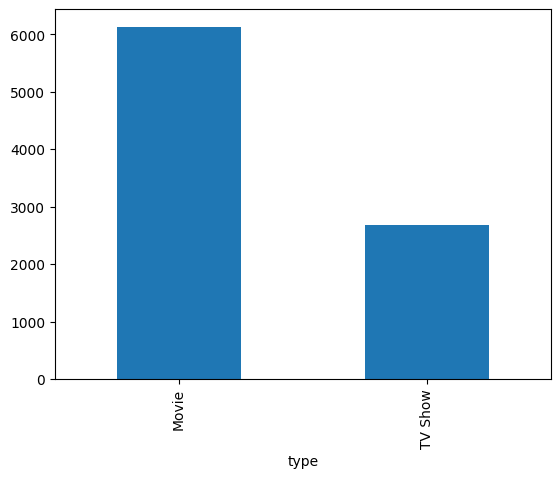

In [6]:
import pandas
import matplotlib.pyplot as plt

df = pandas.read_csv("netflix_dataset.csv")

type_distribution = df['type'].value_counts()
print(type_distribution)

type_distribution.plot(kind='bar')
plt.show()


### Patterns:
- There are significantly more movies (6131) than TV shows (2676) available in this dataset.
- The number of movies is more than double the number of TV shows, suggesting that Netflix has a stronger focus on movies in their catalog.

### Insights:
- This could indicate a content strategy that prioritizes movies, possibly due to higher demand or better viewer retention.
- It's also possible that the production and acquisition costs, along with licensing agreements, might be more favorable for movies compared to TV shows.

In [7]:
print(type_distribution)

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


## Analyze trends over time in the type of content being added to Netflix

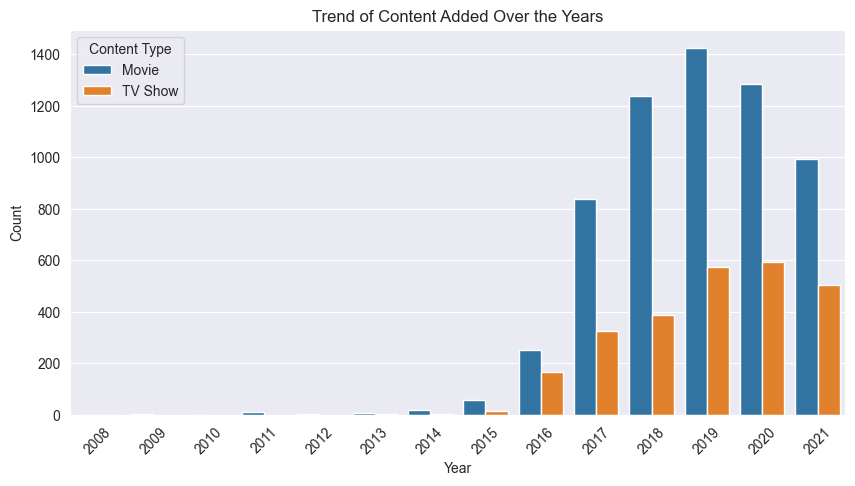

Movie Counts by Year:
year_added
2008       1
2009       2
2010       1
2011      13
2012       3
2013       6
2014      19
2015      56
2016     253
2017     839
2018    1237
2019    1424
2020    1284
2021     993
dtype: int64
TV Shows Counts by Year:
year_added
2008      1
2013      4
2014      4
2015     17
2016    165
2017    325
2018    388
2019    575
2020    594
2021    505
dtype: int64


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
netflix_df = pd.read_csv("netflix_dataset.csv")

# Drop rows with missing date_added values
netflix_df = netflix_df.dropna(subset=['date_added'])

# Convert date_added column to datetime with custom format
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], format='%B %d, %Y', errors='coerce')

# Drop rows where conversion fails
netflix_df = netflix_df.dropna(subset=['date_added'])

# Extract year from date_added
netflix_df['year_added'] = netflix_df['date_added'].dt.year

# Plot the trend of content added over the years
plt.figure(figsize=(10, 5))
sns.countplot(x='year_added', hue='type', data=netflix_df)
plt.title('Trend of Content Added Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Content Type')
plt.show()

# Check for duplicates
duplicate_rows = netflix_df[netflix_df.duplicated()]
#print("Duplicate Rows:")
#print(duplicate_rows)

movie_counts = netflix_df[netflix_df['type'] == 'Movie'].groupby('year_added').size()
tv_show_counts = netflix_df[netflix_df['type'] == 'TV Show'].groupby('year_added').size()

print("Movie Counts by Year:")
print(movie_counts)

print("TV Shows Counts by Year:")
print(tv_show_counts)

total_actual_movies = netflix_df['type'].value_counts()['Movie']
total_actual_tvshows = netflix_df['type'].value_counts()['TV Show']
#print("Total Movies:", total_actual_movies)
#print("Total TV Shows:", total_actual_tvshows)

### Patterns:
- There are significantly more movies than TV shows trending every year after 2008 according to the dataset.
- In 2019 the number of movies trending was maximized ( 1424).
- In 2020 the number of TV shows trending was maximized ( 594).
- The trending number of movies was growing till 2019 and then began to fall hitting 993 in 2021
- The trending number of TV shows was growing till 2020 and then began falling hitting 505 in 2021

### Insights:
- This could indicate that people prefer movies to TV shows making them more trendy each year

## 2. Release Year Analysis. Investigate the distribution of content by release year.

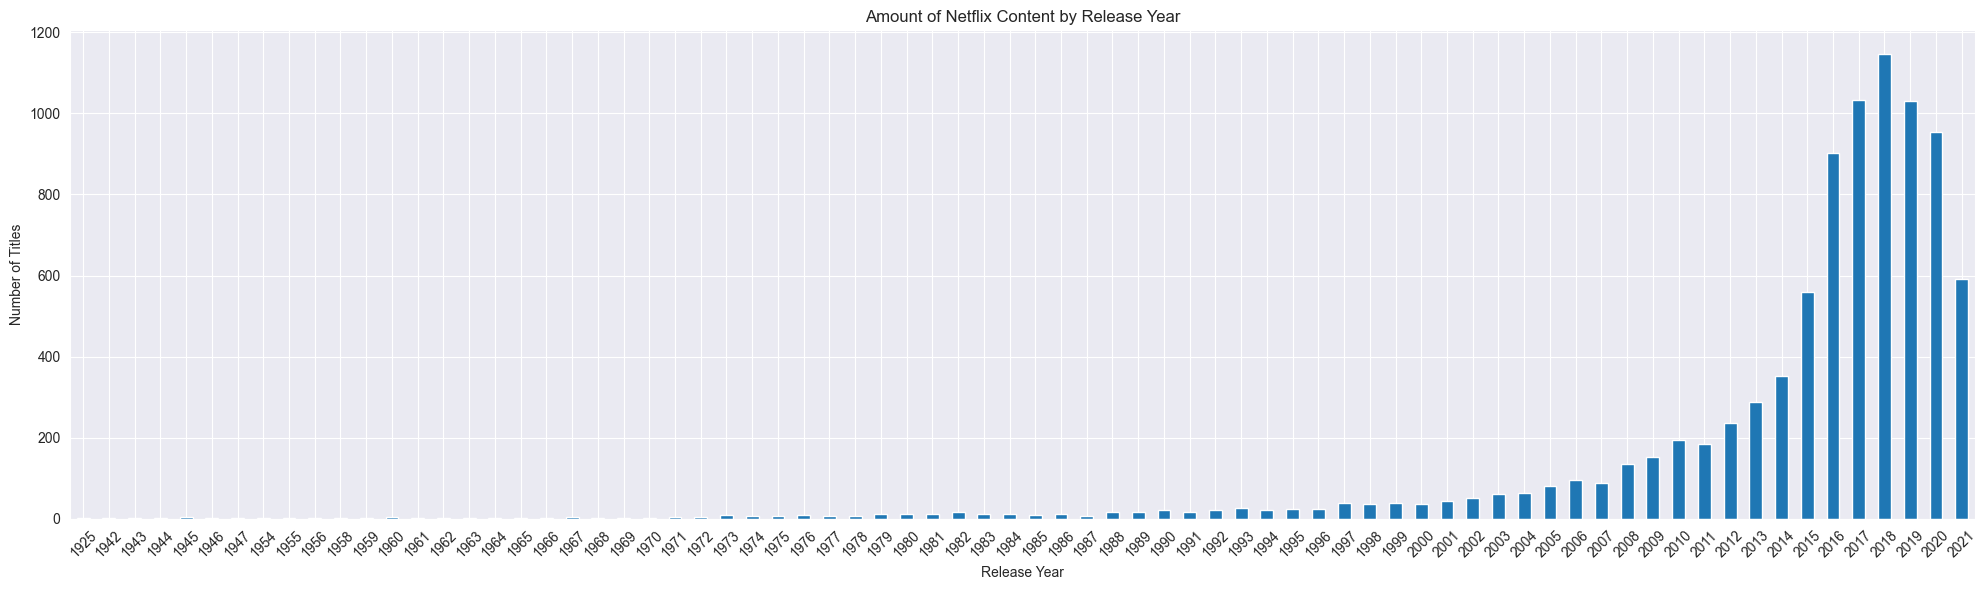

Distribution of Netflix Content by Release Year:
release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: count, Length: 74, dtype: int64


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Netflix dataset
netflix_data = pd.read_csv('netflix_dataset.csv')

# Plot distribution of content by release year
plt.figure(figsize=(20, 6))
netflix_data['release_year'].value_counts().sort_index().plot(kind='bar')
plt.title('Amount of Netflix Content by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
content_distribution = netflix_data['release_year'].value_counts().sort_index()
print("Distribution of Netflix Content by Release Year:")
print(content_distribution)

Total number of movies: 6131
Total number of TV shows: 2676

Distribution of movies among years:
release_year
1925      0
1942      2
1943      3
1944      3
1945      3
       ... 
2017    767
2018    767
2019    633
2020    517
2021    277
Name: count, Length: 74, dtype: int64

Distribution of TV shows among years:
release_year
1925      1
1942      0
1943      0
1944      0
1945      1
       ... 
2017    265
2018    380
2019    397
2020    436
2021    315
Name: count, Length: 74, dtype: int64


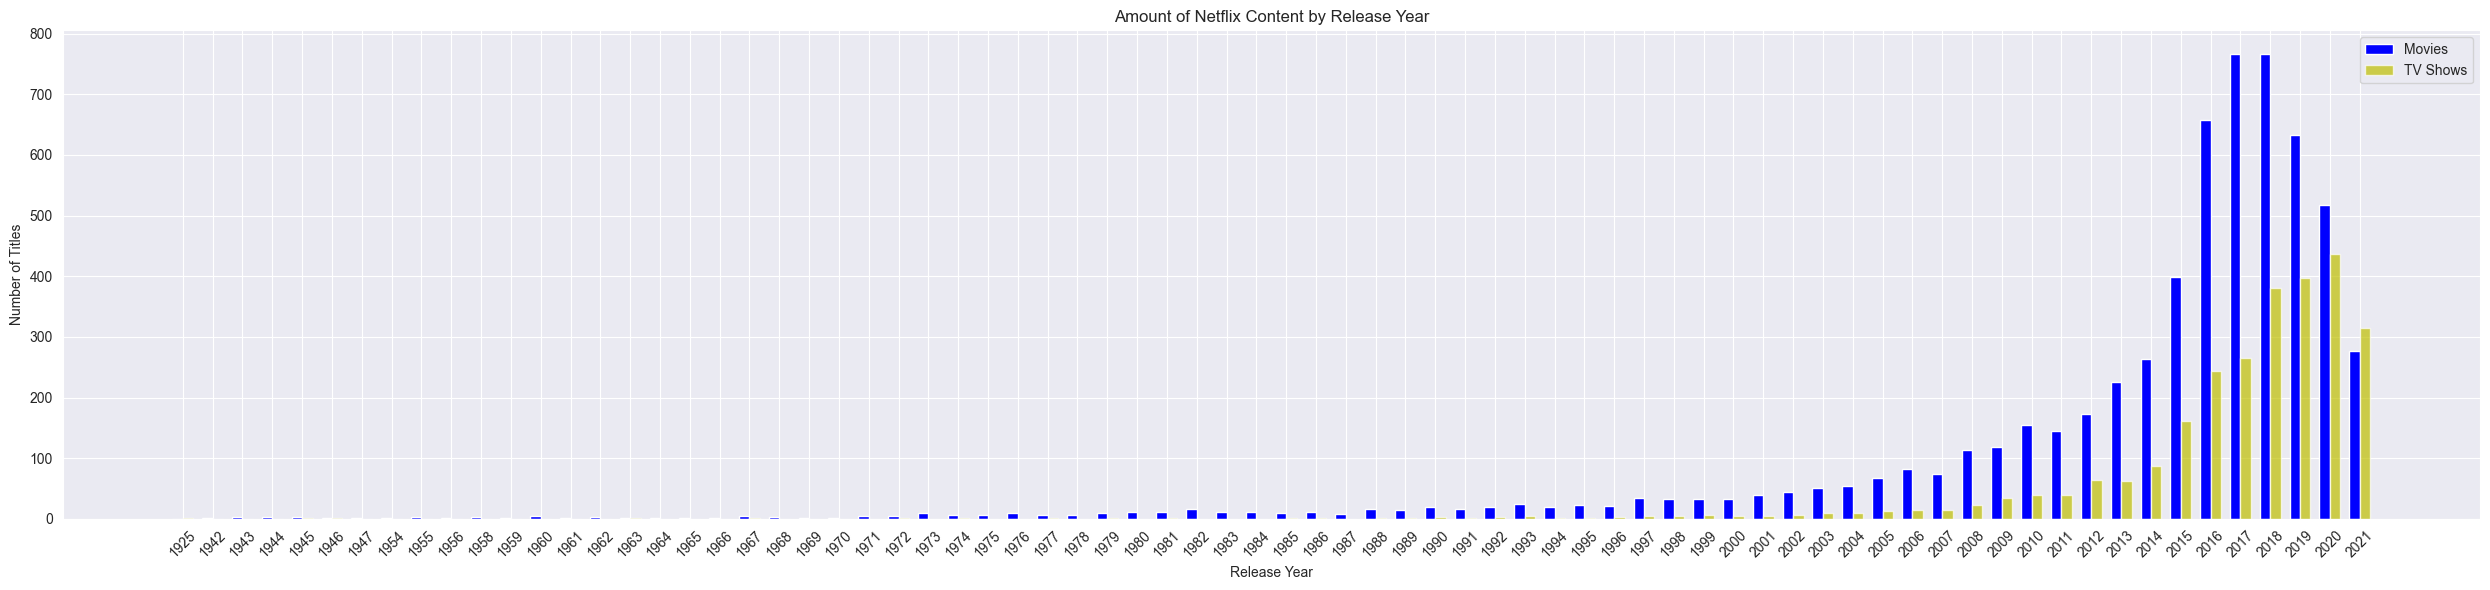

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the Netflix dataset
netflix_data = pd.read_csv('netflix_dataset.csv')

# Filtering movies and TV shows
movies = netflix_data[netflix_data['type'] == 'Movie']
tv_shows = netflix_data[netflix_data['type'] == 'TV Show']

# Grouping by release year for movies and TV shows
movies_by_year = movies['release_year'].value_counts().sort_index()
tv_shows_by_year = tv_shows['release_year'].value_counts().sort_index()

# Aligning years for TV shows
merged_index = movies_by_year.index.union(tv_shows_by_year.index)
movies_by_year = movies_by_year.reindex(merged_index, fill_value=0)
tv_shows_by_year = tv_shows_by_year.reindex(merged_index, fill_value=0)

# Determining the width of the bars
bar_width = 0.35

# Creating numerical indices for years
years = np.arange(len(merged_index))

# Print key details
print("Total number of movies:", movies.shape[0])
print("Total number of TV shows:", tv_shows.shape[0])
print()

# Print distribution of movies and TV shows among years
print("Distribution of movies among years:")
print(movies_by_year)
print()

print("Distribution of TV shows among years:")
print(tv_shows_by_year)
print()

# Creating the plot
plt.figure(figsize=(25, 6))

# Adding bars for movies
plt.bar(years - bar_width / 2, movies_by_year, bar_width, color='b', label='Movies')

# Adding bars for TV shows
plt.bar(years + bar_width / 2, tv_shows_by_year, bar_width, color='y', label='TV Shows', alpha=0.7)

plt.title('Amount of Netflix Content by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.xticks(years, merged_index)  # Setting x-axis labels for years
plt.xticks(rotation=45)
plt.legend()  # Adding legend
plt.tight_layout()
plt.show()

### Patterns:
- The content was being released in relatively constantly growing amounts with years passing. But there are some overall falls in 2008, 2012 and 2019-2021 
- The distribution of movie releases was growing up to 2019 hitting pick in 2017-2018 with 767 and then beginning to fall down to 277 in 2021
- The distribution of TV Shows releases was growing up to 2021 hitting pick in 2020 with 436 releases and then falling to 315
- There have always been more movies released except for 2021 when the distribution looked like this: Movies reached only 277 and TV Shows hit 315 in releases

### Insights:
- Looking at the diagram it is possible to assume that the demand and financing was growing through the years resulting in higher overall release numbers
- Remembering the Covid times of 2020 it is logical to say that the fall in content-release of 2020 and 2021 was due to those events
- The higher release numbers of TV Shows than movies in 2021 and the falling difference between the two in earlier years lets us assume that the demand for TV Shows started overgrowing the demand for movies

## Identify trends in the production of new content over the years

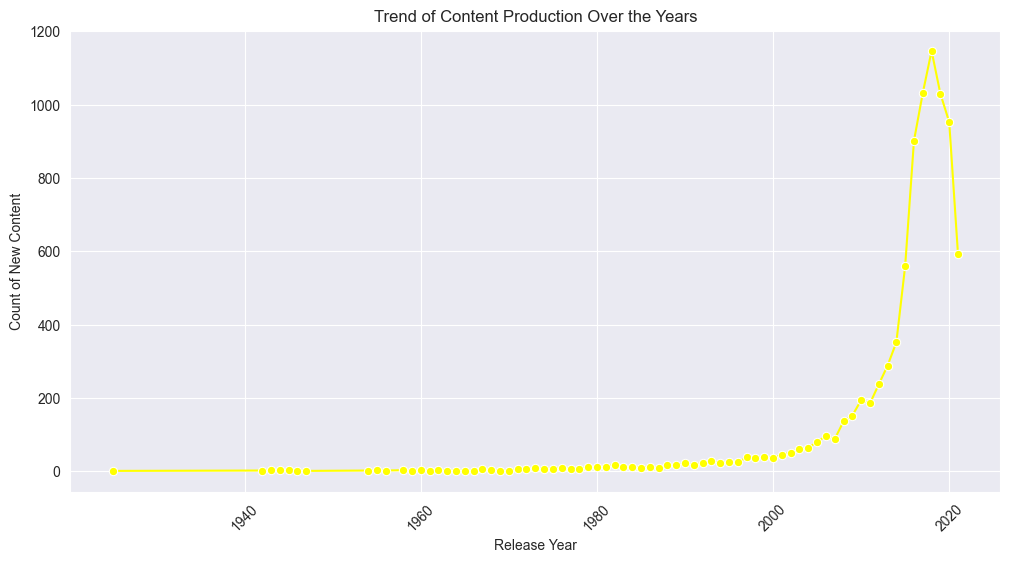

In [7]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

netflix_df = pd.read_csv("netflix_dataset.csv")
# Group the dataset by release year and count the number of content releases for each year
content_by_year = netflix_df.groupby('release_year').size().reset_index(name='count')

# Plot the trend of content production over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='release_year', y='count', data=content_by_year, marker='o', color='yellow')
plt.title('Trend of Content Production Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Count of New Content')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

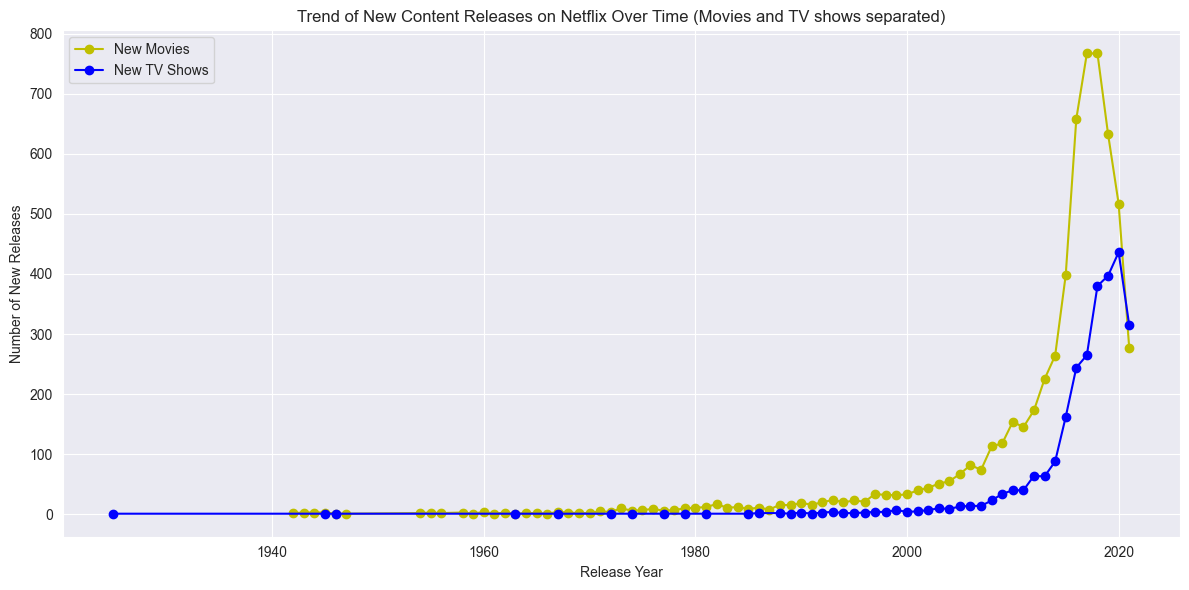

Total number of movies: 6131
Total number of TV shows: 2676

Distribution of movies among years:
release_year
1942      2
1943      3
1944      3
1945      3
1946      1
       ... 
2017    767
2018    767
2019    633
2020    517
2021    277
Length: 73, dtype: int64

Distribution of TV shows among years:
release_year
1925      1
1945      1
1946      1
1963      1
1967      1
1972      1
1974      1
1977      1
1979      1
1981      1
1985      1
1986      2
1988      2
1989      1
1990      3
1991      1
1992      3
1993      4
1994      2
1995      2
1996      3
1997      4
1998      4
1999      7
2000      4
2001      5
2002      7
2003     10
2004      9
2005     13
2006     14
2007     14
2008     23
2009     34
2010     40
2011     40
2012     64
2013     63
2014     88
2015    162
2016    244
2017    265
2018    380
2019    397
2020    436
2021    315
dtype: int64


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Netflix dataset
netflix_data = pd.read_csv('netflix_dataset.csv')

# Filter movies and TV shows
movies = netflix_data[netflix_data['type'] == 'Movie']
tv_shows = netflix_data[netflix_data['type'] == 'TV Show']

# Calculate number of new movie releases each year
new_movies_by_year = movies.groupby('release_year').size()

# Calculate number of new TV show releases each year
new_tv_shows_by_year = tv_shows.groupby('release_year').size()

# Plot trend of new content releases over time
plt.figure(figsize=(12, 6))

new_movies_by_year.plot(kind='line', marker='o', color='y', label='New Movies')
new_tv_shows_by_year.plot(kind='line', marker='o', color='b', label='New TV Shows')

plt.title('Trend of New Content Releases on Netflix Over Time (Movies and TV shows separated)')
plt.xlabel('Release Year')
plt.ylabel('Number of New Releases')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Calculate total number of movies and TV shows
total_movies = movies.shape[0]
total_tv_shows = tv_shows.shape[0]

# Print key details
print("Total number of movies:", total_movies)
print("Total number of TV shows:", total_tv_shows)
print()

# Print distribution of movies and TV shows among years
print("Distribution of movies among years:")
print(new_movies_by_year)
print()

print("Distribution of TV shows among years:")
print(new_tv_shows_by_year)
print()

### Patterns:
- The production of movies and TV shows was growing almost constantly up to 2019 for TV shows and 2020 for movies
- Movies show themselves to be produced more than the TV shows in the later years and up to 2021

### Insights:
- The early years data is very hard to analyze due to its incompletion and really low numbers. But talking about newer data it is easy to say that production was growing of both movies and TV shows with the difference becoming less and less and finally resulting in TV shows having higher production, and make an assumption that the demand for TV shows was constantly growing relatively to the demand for movies


## Ratings Analysis: Explore the distribution of content by ratings (e.g., G, PG, PG-13, R, etc.).

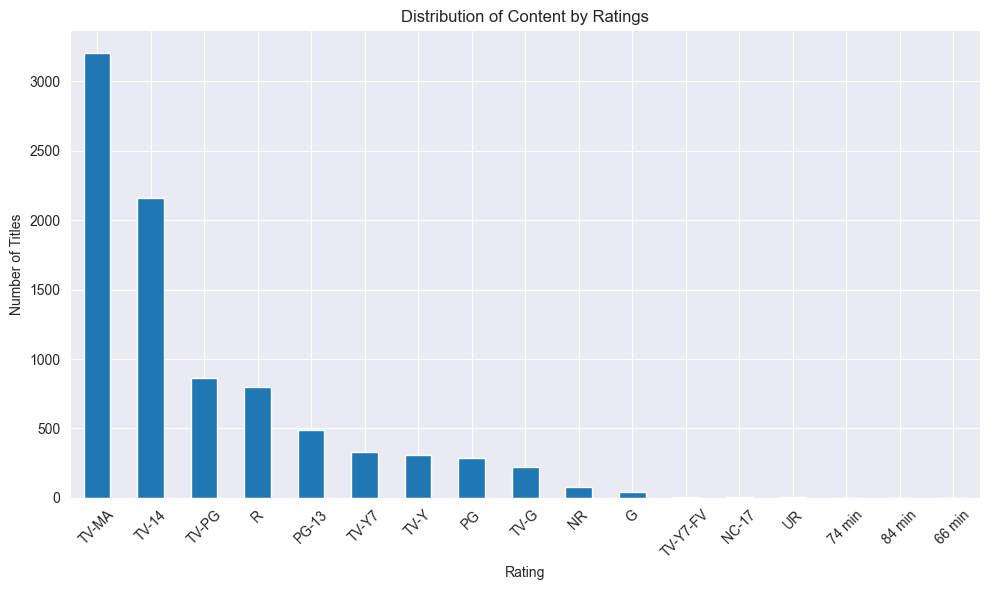

Distribution of content by ratings:
rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Netflix dataset
netflix_data = pd.read_csv('netflix_dataset.csv')

# 1. Explore the distribution of content by ratings
ratings_distribution = netflix_data['rating'].value_counts()

# Plotting the distribution of content by ratings
plt.figure(figsize=(10, 6))
ratings_distribution.plot(kind='bar')
plt.title('Distribution of Content by Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Displaying the ratings distribution
print("Distribution of content by ratings:")
print(ratings_distribution)


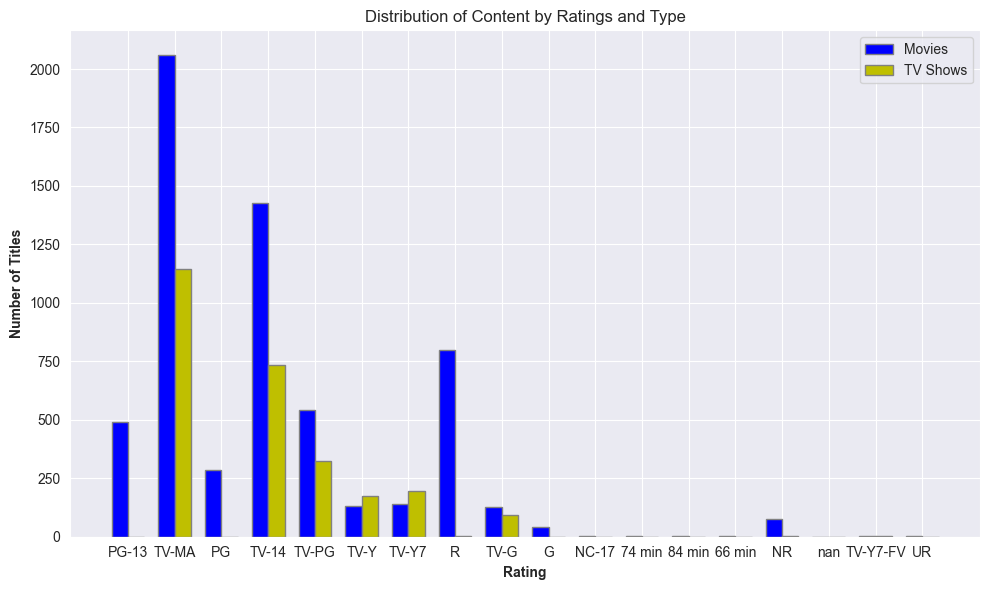

Distribution of movies by ratings:
PG-13: 490
TV-MA: 2062
PG: 287
TV-14: 1427
TV-PG: 540
TV-Y: 131
TV-Y7: 139
R: 797
TV-G: 126
G: 41
NC-17: 3
74 min: 1
84 min: 1
66 min: 1
NR: 75
nan: 0
TV-Y7-FV: 5
UR: 3

Distribution of TV shows by ratings:
PG-13: 0
TV-MA: 1145
PG: 0
TV-14: 733
TV-PG: 323
TV-Y: 176
TV-Y7: 195
R: 2
TV-G: 94
G: 0
NC-17: 0
74 min: 0
84 min: 0
66 min: 0
NR: 5
nan: 0
TV-Y7-FV: 1
UR: 0


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the Netflix dataset
netflix_data = pd.read_csv('netflix_dataset.csv')

# Filter movies and TV shows
movies = netflix_data[netflix_data['type'] == 'Movie']
tv_shows = netflix_data[netflix_data['type'] == 'TV Show']

# Get unique rating categories
rating_categories = netflix_data['rating'].unique()

# Initialize lists to store counts for movies and TV shows by rating category
movies_counts = []
tv_shows_counts = []

# Iterate over each rating category
for rating in rating_categories:
    # Count movies and TV shows for each rating category
    movies_counts.append(movies[movies['rating'] == rating].shape[0])
    tv_shows_counts.append(tv_shows[tv_shows['rating'] == rating].shape[0])

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = np.arange(len(rating_categories))
r2 = [x + bar_width for x in r1]

# Create the grouped bar plot
plt.figure(figsize=(10, 6))
plt.bar(r1, movies_counts, color='b', width=bar_width, edgecolor='grey', label='Movies')
plt.bar(r2, tv_shows_counts, color='y', width=bar_width, edgecolor='grey', label='TV Shows')

# Add labels and title
plt.xlabel('Rating', fontweight='bold')
plt.ylabel('Number of Titles', fontweight='bold')
plt.xticks([r + bar_width / 2 for r in range(len(rating_categories))], rating_categories)
plt.title('Distribution of Content by Ratings and Type')

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

# Print distribution of movies and TV shows by ratings
print("Distribution of movies by ratings:")
for rating, count in zip(rating_categories, movies_counts):
    print(f"{rating}: {count}")

print("\nDistribution of TV shows by ratings:")
for rating, count in zip(rating_categories, tv_shows_counts):
    print(f"{rating}: {count}")

### Patterns:
- TV-MA rating has the most content (3207). 74, 84 and 66 min ratings have the least content.
- There are no TV shows with PG-13, PG, G, NC-17, UR, 74, 84 and 66 min ratings unlike movies.
- None of the content has nan rating
- Most movies and most TV shows both have higher distributions at TV-MA, TV-14 ratings

### Insights:
- Netflix rating system is based on both user ratings and viewing history. Most of Netflix content is designed for mature audience or is advised to be watched under parental guidence making Netflix not a childish platform even close.
- Only around 650 (647 exactly) pieces of content are TV-Y-rated.

## Build the correlation between the entry's Rating & Country (where the entry was produced)

Argentina: NR: 2; PG: 1; R: 1; TV-14: 10; TV-G: 2; TV-MA: 55; TV-PG: 3; TV-Y: 2
Australia: NR: 2; PG: 7; PG-13: 3; R: 10; TV-14: 15; TV-G: 6; TV-MA: 41; TV-PG: 17; TV-Y: 11; TV-Y7: 4
Brazil: NR: 2; PG: 2; PG-13: 1; R: 1; TV-14: 11; TV-G: 3; TV-MA: 54; TV-PG: 7; TV-Y: 3
Canada: G: 2; NC-17: 1; NR: 4; PG: 12; PG-13: 7; R: 37; TV-14: 38; TV-G: 15; TV-MA: 87; TV-PG: 27; TV-Y: 22; TV-Y7: 18; TV-Y7-FV: 1
China: NR: 2; PG: 3; PG-13: 4; R: 3; TV-14: 47; TV-G: 3; TV-MA: 23; TV-PG: 10; TV-Y: 3; TV-Y7: 2
Colombia: TV-14: 14; TV-MA: 26
Denmark: NR: 2; PG-13: 1; R: 3; TV-14: 3; TV-G: 1; TV-MA: 16; TV-Y: 1; TV-Y7: 2; TV-Y7-FV: 1
Egypt: TV-14: 75; TV-G: 1; TV-MA: 30; TV-PG: 6
France: G: 1; NC-17: 1; NR: 1; PG: 9; PG-13: 8; R: 15; TV-14: 32; TV-G: 2; TV-MA: 114; TV-PG: 4; TV-Y: 15; TV-Y7: 9; UR: 1
Germany: G: 1; NR: 1; PG: 4; PG-13: 7; R: 13; TV-14: 15; TV-G: 4; TV-MA: 47; TV-PG: 7; TV-Y: 2; TV-Y7: 2
Hong Kong: NR: 1; PG: 2; PG-13: 2; R: 14; TV-14: 31; TV-MA: 25; TV-PG: 4
India: NR: 4; PG: 4; PG-13: 5

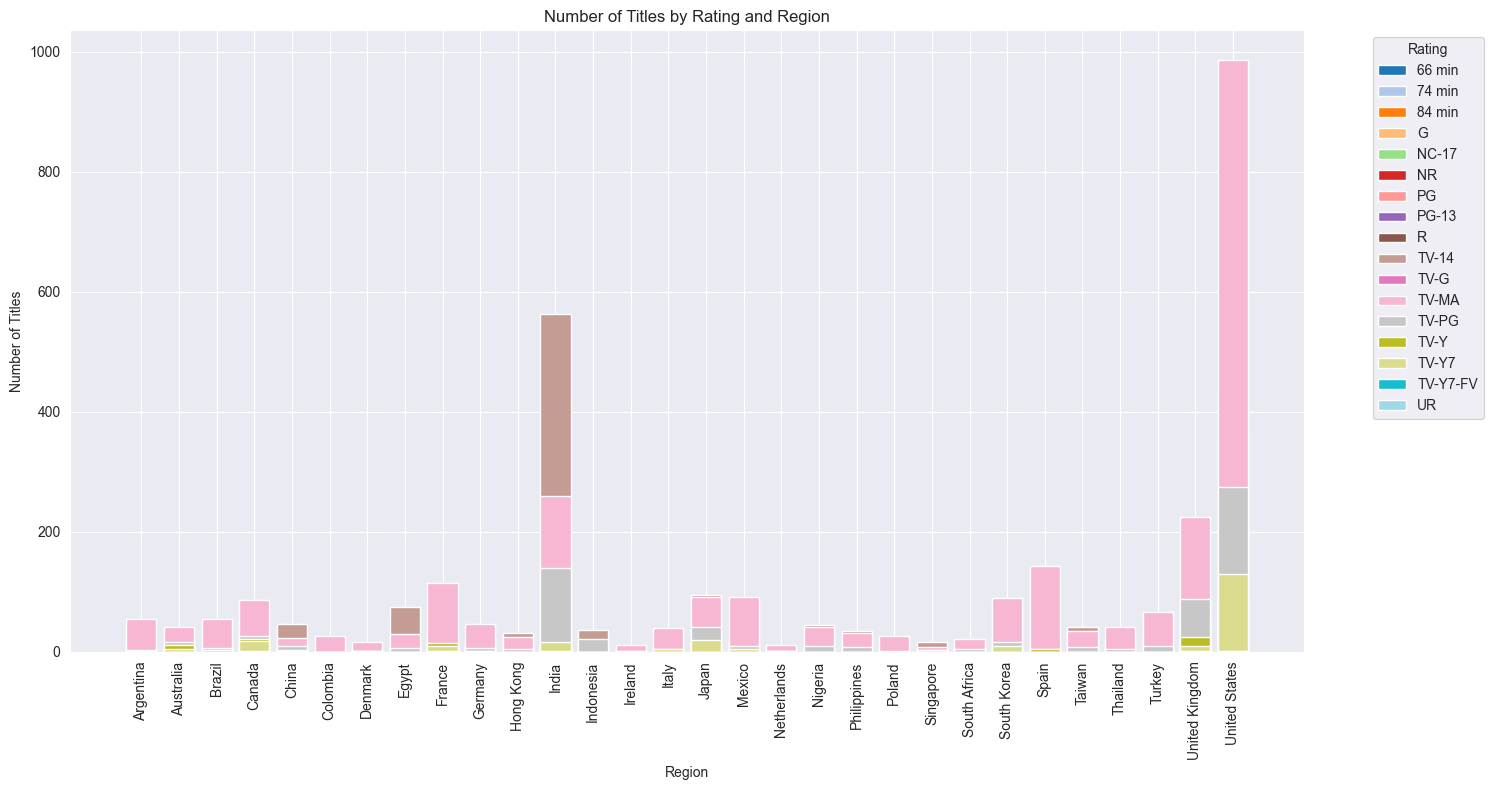

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

NUM_OF_COUNTRIES = 30

# Load the Netflix dataset into a DataFrame and drop rows with missing values in the 'rating' and 'country' columns
netflix_data = pd.read_csv('netflix_dataset.csv')
netflix_data.dropna(subset=['rating', 'country'], inplace=True)

# Extract regions from countries (assuming regions are separated by ',')
netflix_data['region'] = netflix_data['country'].apply(lambda x: x.split(',')[0].strip())

# Get the top 10 countries with the most titles
top_countries = netflix_data['region'].value_counts().nlargest(NUM_OF_COUNTRIES).index

# Filter the data to include only the top 10 countries
netflix_data = netflix_data[netflix_data['region'].isin(top_countries)]

# Get all unique ratings present in the filtered dataset
unique_ratings = sorted(netflix_data['rating'].unique())

# Group the filtered data by 'region' and 'rating', and count the number of entries
grouped_data = netflix_data.groupby(['region', 'rating']).size().unstack(fill_value=0)

# Create a colormap with enough distinct colors to cover all unique ratings
num_ratings = len(unique_ratings)
cmap = plt.get_cmap('tab20', num_ratings)

# Plot the bar chart
plt.figure(figsize=(15, 8))

# Iterate over each rating and plot a bar for each country using the corresponding color
for i, rating in enumerate(unique_ratings):
    color = cmap(i)
    bars = plt.bar(grouped_data.index, grouped_data[rating], color=color, label=rating)

for region in grouped_data.index:
        ratings_counts = "; ".join([f"{rating}: {count}" for rating, count in grouped_data.loc[region].items() if count >= 1])
        print(f'{region}: {ratings_counts}')


plt.title('Number of Titles by Rating and Region')
plt.xlabel('Region')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)  # Rotate country labels for better readability
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Patterns:
- TV-MA rating is the most popular for each of the countries except for India and China where it takes only 260 and 23 accordinally.
- The most popular rating in India is TV-14 (563)
- The most popular rating in China is TV-14 (47)

### Insights:
- Such distribution suggests the difference between Asian countries and other parts of the world

## Duration Analysis: Calculate the average duration of movies.

In [20]:
import pandas as pd

# Load the dataset
netflix_df = pd.read_csv("netflix_dataset.csv")

# Filter the dataset to include only movies
movies_df = netflix_df[netflix_df['type'] == 'Movie'].copy()  # Make a copy to avoid modifying the original DataFrame

# Convert the duration column to numeric format
movies_df['duration'] = movies_df['duration'].str.replace(' min', '').astype(float)

# Calculate the average duration of movies
average_duration = movies_df['duration'].mean()

print(f"Average duration of movies: {average_duration:.2f} minutes")

Average duration of movies: 99.58 minutes


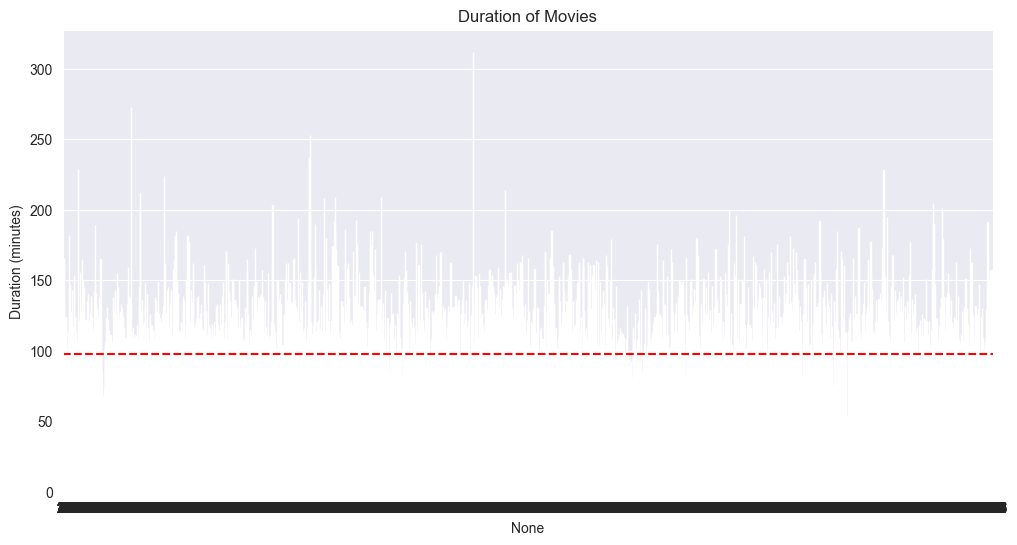

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
netflix_df = pd.read_csv("netflix_dataset.csv")

# Filter the dataset to include only movies
movies_df = netflix_df[netflix_df['type'] == 'Movie'].copy()  # Make a copy to avoid modifying the original DataFrame

# Convert the duration column to numeric format
movies_df['duration'] = movies_df['duration'].str.replace(' min', '').astype(float)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=movies_df.index, y='duration', data=movies_df, color='yellow')

# Add a line for the median duration
median_duration = movies_df['duration'].median()
plt.axhline(y=median_duration, color='red', linestyle='--', label=f'Median Duration: {median_duration:.2f} min')

plt.title('Duration of Movies')
#plt.xlabel('Movie Index')
plt.ylabel('Duration (minutes)')

plt.show()

### Patterns:
- The average duration of movies equals to 99.58 minutes

### Insights:
- With all movies having different duration, 99.58 minutes is the average for all movies in the dataset provided for analysis

## Analyze the distribution of TV shows by the number of seasons

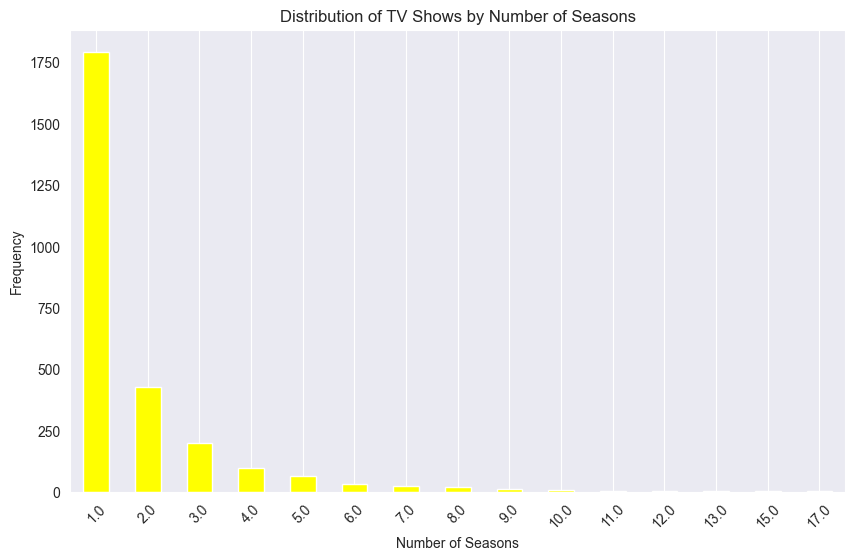

Frequency of TV Shows by Number of Seasons:
num_seasons
1.0     1793
2.0      425
3.0      199
4.0       95
5.0       65
6.0       33
7.0       23
8.0       17
9.0        9
10.0       7
11.0       2
12.0       2
13.0       3
15.0       2
17.0       1
Name: count, dtype: int64


In [25]:
netflix_df = pd.read_csv("netflix_dataset.csv")

# Filter the dataset to include only TV shows
tv_shows_df = netflix_df[
    netflix_df['type'] == 'TV Show'].copy()  # Make a copy to avoid modifying the original DataFrame

# Extract the number of seasons from the 'duration' column
tv_shows_df.loc[:, 'num_seasons'] = tv_shows_df['duration'].str.split().str[0].astype(float)

# Calculate the frequency of TV shows for each number of seasons
seasons_distribution = tv_shows_df['num_seasons'].value_counts().sort_index()

# Visualize the distribution
plt.figure(figsize=(10, 6))
seasons_distribution.plot(kind='bar', color='yellow')
plt.title('Distribution of TV Shows by Number of Seasons')
plt.xlabel('Number of Seasons')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Print the frequency of TV shows for each number of seasons
print("Frequency of TV Shows by Number of Seasons:")
print(seasons_distribution)



### Patterns:
- Most TV Shows (1793) have 1 season. More than four times less TV shows (425) have 2 seasons and more than 9 times less (199) have 3 seasons.
- The more seasons -- the less TV shows

### Insights:
- The falling number of TV shows with the growing number of seasons may be connected to a range of factors. Among them: the show was shutten down after the first season, the show lost financing, the show was initially designed to have not many seasons, the show lost their main cast and could not go on, the show did not find popularity among people

## Country-wise Content Analysis: Assess the volume of content produced by different countries.

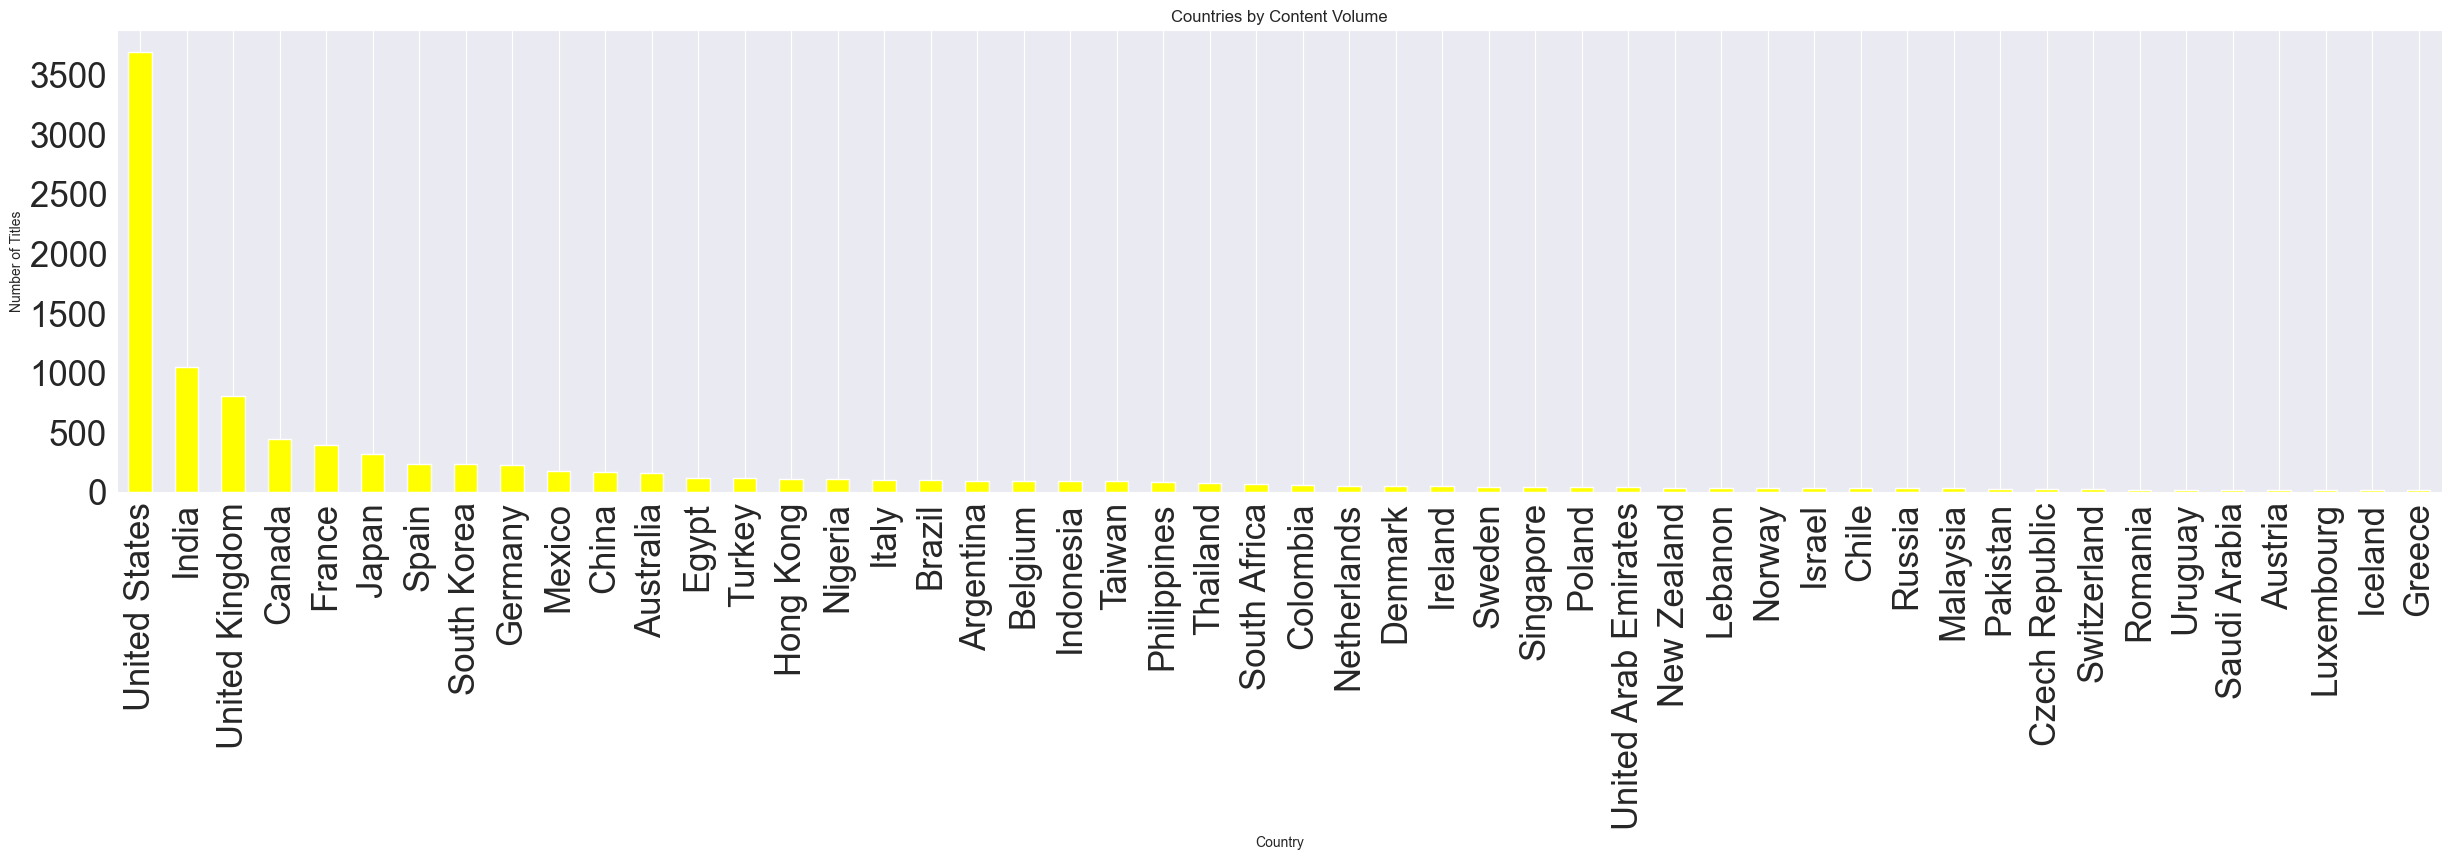

Top 50 Countries by Content Volume:
United States           3689
India                   1046
United Kingdom           804
Canada                   445
France                   393
Japan                    318
Spain                    232
South Korea              231
Germany                  226
Mexico                   169
China                    162
Australia                160
Egypt                    117
Turkey                   113
Hong Kong                105
Nigeria                  103
Italy                    100
Brazil                    97
Argentina                 91
Belgium                   90
Indonesia                 90
Taiwan                    89
Philippines               83
Thailand                  70
South Africa              62
Colombia                  52
Netherlands               50
Denmark                   48
Ireland                   46
Sweden                    42
Singapore                 41
Poland                    40
United Arab Emirates      37
New Zea

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

number_of_countries = 50

# Load the dataset
netflix_df = pd.read_csv("netflix_dataset.csv")

# Split the 'country' column by ',' and create a list of countries for each row
netflix_df['country_list'] = netflix_df['country'].str.split(', ')

# Create a list of all countries
all_countries = [country for sublist in netflix_df['country_list'].dropna() for country in sublist]

# Count the occurrences of each country
country_counts = pd.Series(all_countries).value_counts()

# Visualize the distribution of content by country
plt.figure(figsize=(30, 6))
country_counts[:number_of_countries].plot(kind='bar', color='yellow')
plt.title('Countries by Content Volume')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.yticks(fontsize=25)
plt.xticks(rotation=90, fontsize=25)  # Set font size for x-axis labels
plt.grid(axis='y')
plt.show()

print("Top", number_of_countries, "Countries by Content Volume:")
print(country_counts[:number_of_countries])

### Patterns:
- The most content is produced by The US (3689), India (1046) and The UK (804). After them come Canada, some Asian and European countries.

### Insights:
- Such distribution may be caused by financing and the level of evolution of the industry in a country with The US obviously leading from these points.

## Director and Cast Analysis: Identify directors or cast members with the most titles on Netflix.

#TODO: можна ще додати залежність кількість дайректорів на кількість голосів. типу 8 голосів у 4 дайректорів

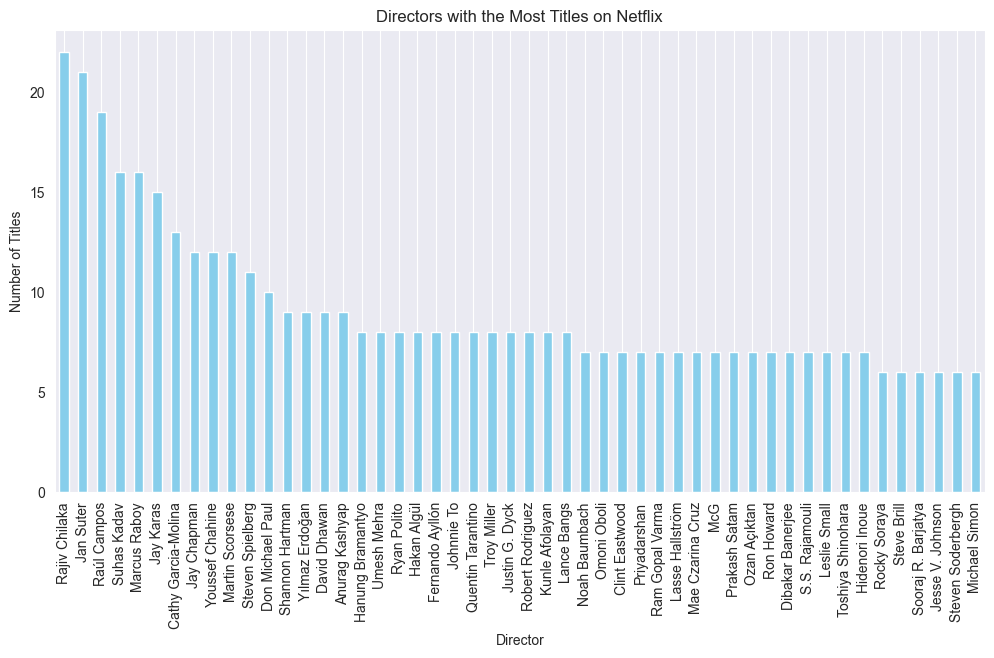

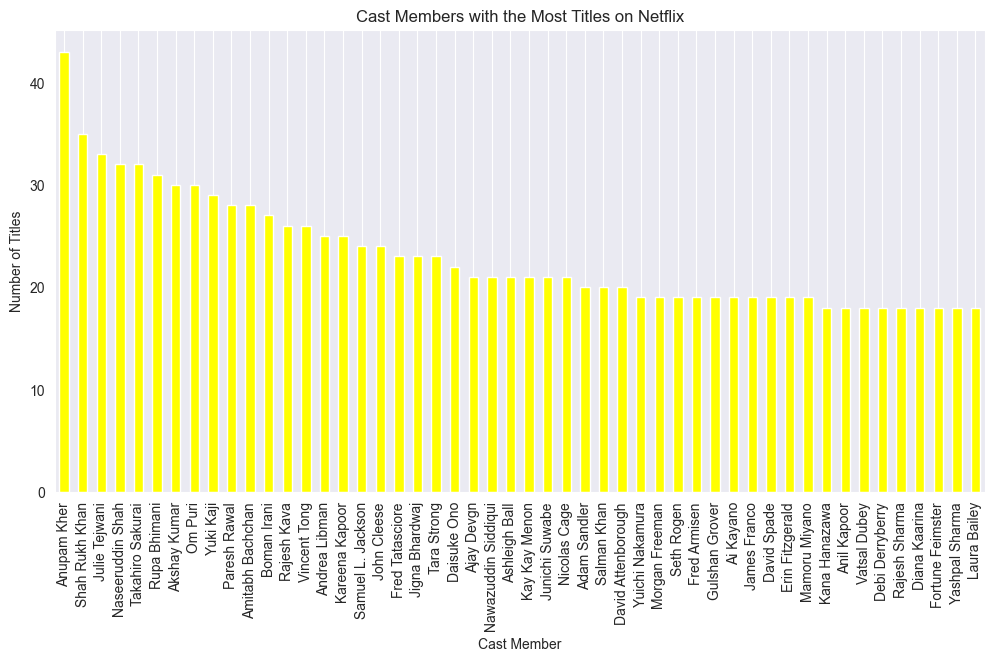

Top 50 Directors with the Most Titles on Netflix:
Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Suhas Kadav            16
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Jay Chapman            12
Youssef Chahine        12
Martin Scorsese        12
Steven Spielberg       11
Don Michael Paul       10
Shannon Hartman         9
Yılmaz Erdoğan          9
David Dhawan            9
Anurag Kashyap          9
Hanung Bramantyo        8
Umesh Mehra             8
Ryan Polito             8
Hakan Algül             8
Fernando Ayllón         8
Johnnie To              8
Quentin Tarantino       8
Troy Miller             8
Justin G. Dyck          8
Robert Rodriguez        8
Kunle Afolayan          8
Lance Bangs             8
Noah Baumbach           7
Omoni Oboli             7
Clint Eastwood          7
Priyadarshan            7
Ram Gopal Varma         7
Lasse Hallström         7
Mae Czarina Cruz        7
McG                     7
Prakash Satam 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

num_of_directors = 50
num_of_actors = 50

# Load the dataset
netflix_df = pd.read_csv("netflix_dataset.csv")

# Split the 'director' column by ',' and create a list of directors for each row
netflix_df['director_list'] = netflix_df['director'].str.split(', ')
# Split the 'cast' column by ',' and create a list of cast members for each row
netflix_df['cast_list'] = netflix_df['cast'].str.split(', ')

# Create a list of all directors and cast members
all_directors = [director for sublist in netflix_df['director_list'].dropna() for director in sublist]
all_cast = [cast for sublist in netflix_df['cast_list'].dropna() for cast in sublist]

# Count the occurrences of each director and cast member
director_counts = pd.Series(all_directors).value_counts()
cast_counts = pd.Series(all_cast).value_counts()

# Visualize the top directors with the most titles
plt.figure(figsize=(12, 6))
director_counts[:num_of_directors].plot(kind='bar', color='skyblue')
plt.title('Directors with the Most Titles on Netflix')
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

# Visualize the top cast members with the most titles
plt.figure(figsize=(12, 6))
cast_counts[:num_of_actors].plot(kind='bar', color='yellow')
plt.title('Cast Members with the Most Titles on Netflix')
plt.xlabel('Cast Member')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

print("Top", num_of_directors, "Directors with the Most Titles on Netflix:")
print(director_counts.head(num_of_directors))

print("\nTop", num_of_actors, "Cast Members with the Most Titles on Netflix:")
print(cast_counts.head(num_of_actors))


### Patterns:
- None of the directors has over 22 mentions with Rajiv Chilaka leading the list. The least mentions is 8 obtained by 4 directors.
- Meanwhile those directors who have the most mentions are not the most famous ones with Steven Spielberg for example having only 11 mentions which is twice less than Rajiv Chilaka

### Insights:
- 

## Map collaboration networks among actors and directors(actors -> directors).

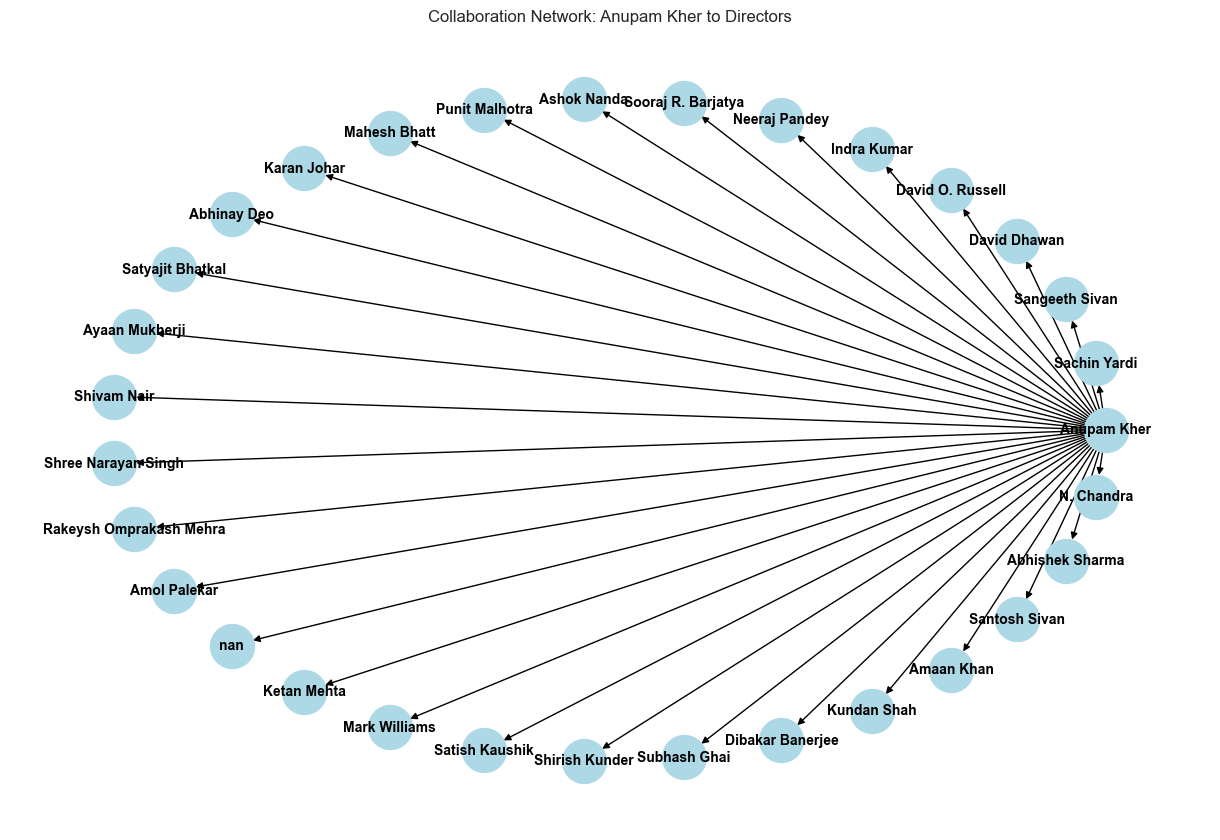

In [42]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the Netflix dataset
netflix_data = pd.read_csv('netflix_dataset.csv')

netflix_data['actors'] = netflix_data['cast'].str.split(', ')

# Select a specific actor (change actor_name to the desired actor)
actor_name = 'Anupam Kher'

# Filter the dataset to include only rows where the selected actor is present
actor_data = netflix_data[netflix_data['actors'].apply(lambda x: actor_name in x if isinstance(x, list) else False)]

# Create a list of unique directors the actor has collaborated with
directors = actor_data['director'].unique()

# Create a directed graph
G = nx.DiGraph()

# Add nodes (actor and directors)
G.add_node(actor_name)
for director in directors:
    G.add_node(director)

# Add edges (collaborations)
for director in directors:
    G.add_edge(actor_name, director)

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=10, font_weight='bold')
plt.title(f"Collaboration Network: {actor_name} to Directors")
plt.show()

### Patterns:
- 

### Insights:
- 

## Genre Analysis: Determine the most popular genres on Netflix.

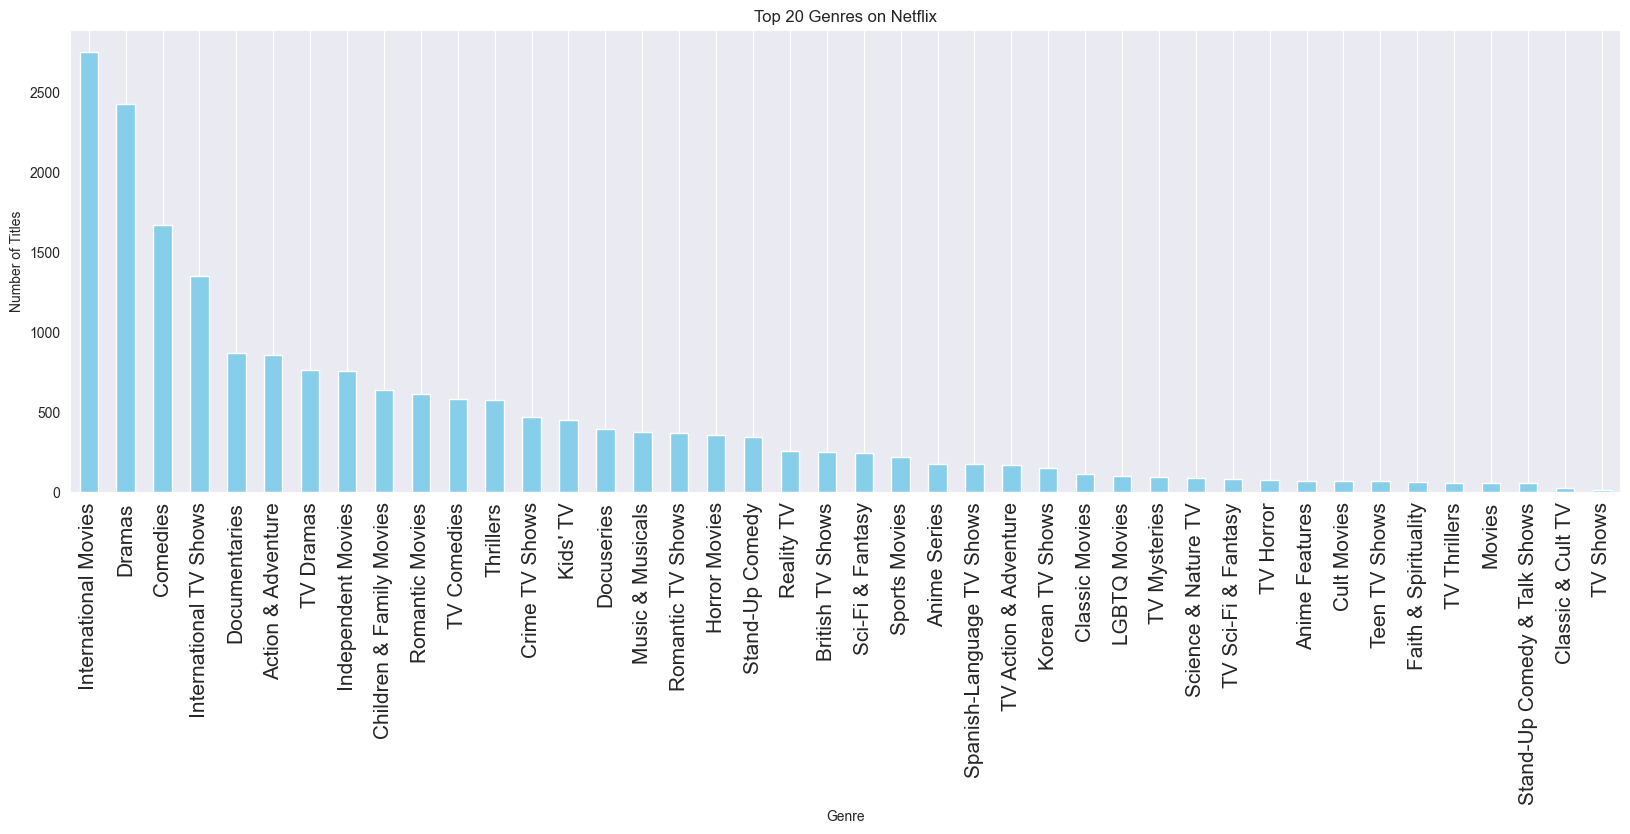

Number of titles for each genre:
International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korea

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
netflix_df = pd.read_csv("netflix_dataset.csv")

# Split the 'listed_in' column by ',' and create a list of genres for each row
netflix_df['genre_list'] = netflix_df['listed_in'].str.split(', ')

# Create a list of all genres
all_genres = [genre for sublist in netflix_df['genre_list'].dropna() for genre in sublist]

# Count the occurrences of each genre
genre_counts = pd.Series(all_genres).value_counts()

# Visualize the distribution of genres
plt.figure(figsize=(20, 6))
genre_counts[:50].plot(kind='bar', color='skyblue')
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90, fontsize=15)
plt.grid(axis='y')
plt.show()

print("Number of titles for each genre:")
print(genre_counts)


### Patterns:
- The most popular genres on Netflix are International Movies (2752), Dramas (2427), Comedies (1674), International TV shows (1351). The least popular are Classic and Cult TV (28) and simple TV shows (16).

### Insights:
- People seem to enjoy more classical generes like International Movies, Dramas, Comedies, Action movies. This may be caused by the fact that people are used to these genres, finding it comfortable to dive into the movie they kinda know what to expect from one.

## Investigate trends in genre popularity over time.

Genre: Documentaries, Release Year: 2021.0, Number of Titles: 1
Genre: International TV Shows, Release Year: 2021.0, Number of Titles: 1
Genre: TV Dramas, Release Year: 2021.0, Number of Titles: 1
Genre: TV Mysteries, Release Year: 2021.0, Number of Titles: 1
Genre: Crime TV Shows, Release Year: 2021.0, Number of Titles: 1
Genre: International TV Shows, Release Year: 2021.0, Number of Titles: 2
Genre: TV Action & Adventure, Release Year: 2021.0, Number of Titles: 1
Genre: Docuseries, Release Year: 2021.0, Number of Titles: 1
Genre: Reality TV, Release Year: 2021.0, Number of Titles: 1
Genre: International TV Shows, Release Year: 2021.0, Number of Titles: 3
Genre: Romantic TV Shows, Release Year: 2021.0, Number of Titles: 1
Genre: TV Comedies, Release Year: 2021.0, Number of Titles: 1
Genre: TV Dramas, Release Year: 2021.0, Number of Titles: 2
Genre: TV Horror, Release Year: 2021.0, Number of Titles: 1
Genre: TV Mysteries, Release Year: 2021.0, Number of Titles: 2
Genre: Children & Fami

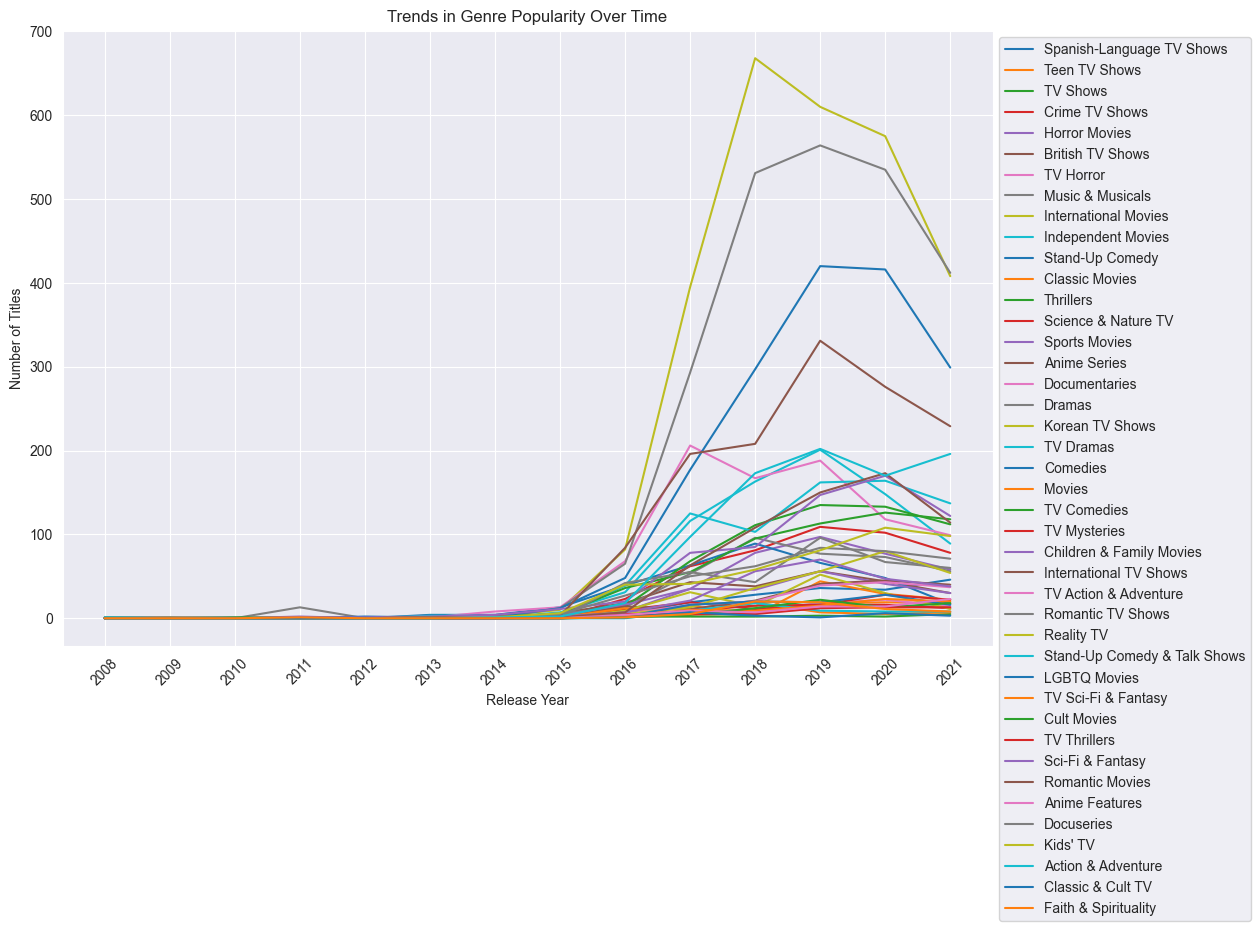

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

# Load the dataset
netflix_df = pd.read_csv("netflix_dataset.csv")

# Specify the format string to handle the date format inconsistency
netflix_df['release_year'] = pd.to_datetime(netflix_df['date_added'], format='%B %d, %Y', errors='coerce').dt.year

# Split the 'listed_in' column by ',' and create a list of genres for each row
netflix_df['genre_list'] = netflix_df['listed_in'].str.split(', ')

# Create a list of all genres
all_genres = [genre for sublist in netflix_df['genre_list'].dropna() for genre in sublist]

# Get unique genres
unique_genres = list(set(all_genres))

# Create a DataFrame to store genre counts for each release year
genre_counts_by_year = pd.DataFrame(index=unique_genres, columns=range(2008, 2022)).fillna(0)

# Count the occurrences of each genre for each release year
for index, row in netflix_df.iterrows():
    if not pd.isna(row['release_year']):  # Check for NaN values in 'release_year'
        for genre in row['genre_list']:
            genre_counts_by_year.loc[genre, row['release_year']] += 1
            print(
                f"Genre: {genre}, Release Year: {row['release_year']}, Number of Titles: {genre_counts_by_year.loc[genre, row['release_year']]}")

# Plot the trends in genre popularity over time
plt.figure(figsize=(12, 8))
for genre in genre_counts_by_year.index:
    plt.plot(genre_counts_by_year.loc[genre], label=genre)
plt.title('Trends in Genre Popularity Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.xticks(range(2008, 2022), rotation=45)
plt.show()

### Patterns:
- International movies were the most popular throughout mostly all time hitting pick in 2018 (~668).
- Most of the movie-genres have relatively smooth trending line troughout years varying up to ~100-150 titles mentioned.
- Most genres have falling numbers after ~2020 and some even earlier

### Insights:
- These patterns may signalise about people choosing the genres they are mostly used to personally (give or take). 
- The pick in 2018 of International movies and the ongoing fall may be caused by less production of high-quality content of the genre and though people choosing it less.
- The 2020 massive fall may be explained by Covid times

## Textual Analysis of Titles and Descriptions: Discover common keywords in titles and descriptions.

Most common keywords in titles and descriptions:
[('life', 850), ('young', 741), ('new', 739), ('love', 667), ('family', 606), ('man', 572), ('world', 561), ('two', 522), ('friends', 494), ('she', 481), ('woman', 467), ('series', 415), ('one', 409), ('must', 400), ('while', 378), ('documentary', 364), ('find', 343), ('school', 342), ('home', 329), ('finds', 313), ('where', 306), ('three', 299), ('help', 294), ('lives', 287), ('all', 286), ('takes', 280), ('own', 277), ('years', 274), ('girl', 265), ('group', 263), ('back', 260), ('high', 259), ('more', 255), ('story', 251), ('father', 249), ('take', 249), ('city', 239), ('special', 230), ('through', 228), ('true', 227), ('war', 226), ('get', 226), ('save', 226), ('time', 216), ('other', 216), ('over', 215), ('murder', 215), ('team', 213), ('show', 213), ('teen', 212), ('against', 211), ('down', 207), ('four', 206), ('daughter', 206), ('death', 204), ('have', 204), ('becomes', 202), ('between', 202), ('son', 199), ('comedy', 191), ('pas

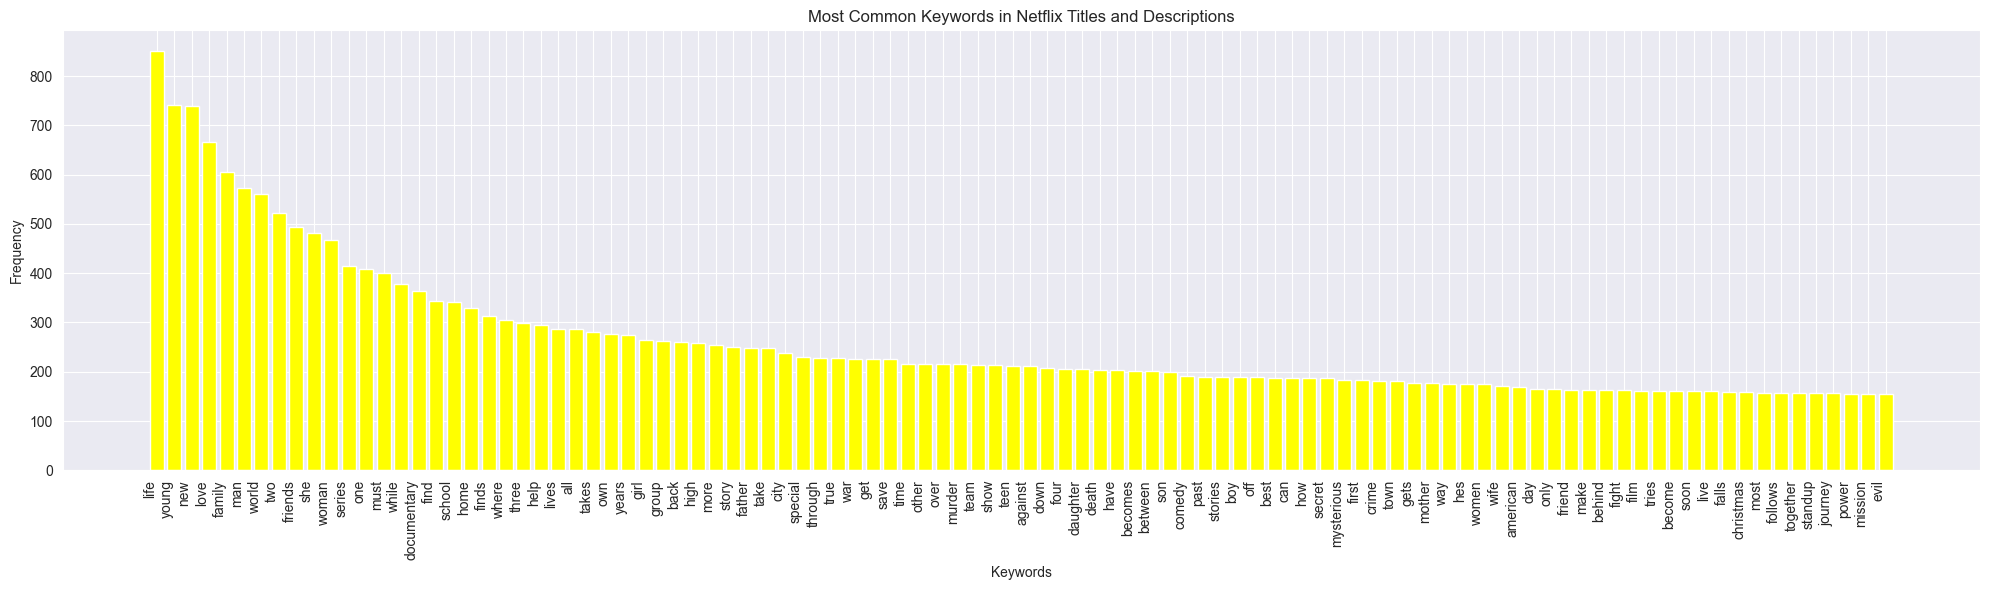

In [29]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt

WORDS_NUM = 100
# Load the Netflix dataset into a Pandas DataFrame
netflix_data = pd.read_csv("netflix_dataset.csv")

# Combine titles and descriptions into a single text column
netflix_data['text'] = netflix_data['title'] + ' ' + netflix_data['description']

# Convert text to lowercase
netflix_data['text'] = netflix_data['text'].str.lower()

# Remove special characters and punctuation
netflix_data['text'] = netflix_data['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Split text into individual words
words = ' '.join(netflix_data['text']).split()

stopwords = set(
    ['the', 'is', 'and', 'a', 'an', 'to', 'of', 'in', 'with', 'his', 'her', 'for', 'on', 'their', 'when', 'this',
     'from', 'as', 'out', 'by', 'after', 'he', 'that', 'who', 'but', 'at', 'they', 'into', 'up', 'out', 'him', 'its', 'be', 'it', 'them', 'about', 'has', 'are'])
words = [word for word in words if word not in stopwords]

# Count the frequency of each word
word_freq = Counter(words)

print("Most common keywords in titles and descriptions:")
print(word_freq.most_common(WORDS_NUM))

common_keywords = [word[0] for word in word_freq.most_common(WORDS_NUM)]
common_keywords_freq = [word[1] for word in word_freq.most_common(WORDS_NUM)]

plt.figure(figsize=(20, 6))
plt.bar(common_keywords, common_keywords_freq, color='yellow')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.title('Most Common Keywords in Netflix Titles and Descriptions')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

### Patterns:
- Except for the words in stopwords set that are articles, pronouns and other linking words the most popular are words like "life" (850), "young" (741), "new" (739), "love" (667), "family" (606). 

### Insights:
- I would say that all the most popular words have rather positive vibe.
- I have also noticed the fact that the word "man" (572) is met more often than the word "woman" (467)

## Split content by seasons (summer, winter...) and build a chat to show when more entries were produced. Use a bar chart to visualize

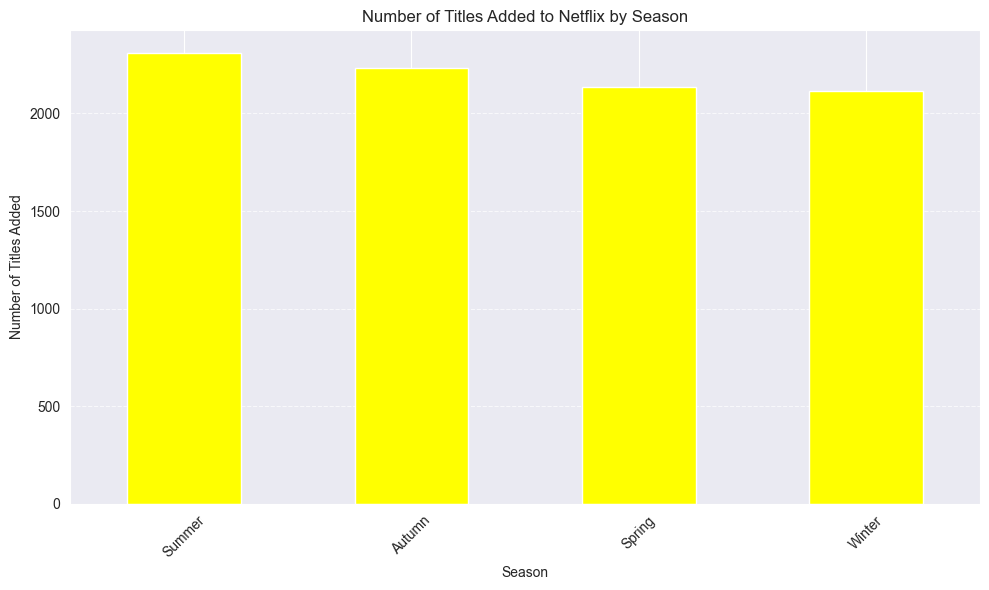

Number of Titles Added to Netflix by Season:
Summer: 2310
Autumn: 2235
Spring: 2138
Winter: 2114


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Netflix dataset into a Pandas DataFrame
netflix_data = pd.read_csv("netflix_dataset.csv")

# Cleaning the 'date_added' column
netflix_data['date_added'] = netflix_data['date_added'].str.strip()

# Extracting month information from the 'date_added' column
netflix_data['month_added'] = pd.to_datetime(netflix_data['date_added']).dt.month

# Define seasons
seasons = {
    'Spring': [3, 4, 5],
    'Summer': [6, 7, 8],
    'Autumn': [9, 10, 11],
    'Winter': [12, 1, 2]
}


# Function to categorize each entry into a season
def get_season(month):
    for season, months in seasons.items():
        if month in months:
            return season


# Apply the function to create a new column for the season
netflix_data['season'] = netflix_data['month_added'].apply(get_season)

# Count the number of entries produced in each season
season_counts = netflix_data['season'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
season_counts.plot(kind='bar', color='yellow')
plt.title('Number of Titles Added to Netflix by Season')
plt.xlabel('Season')
plt.ylabel('Number of Titles Added')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Number of Titles Added to Netflix by Season:")
for season, count in season_counts.items():
    print(f"{season}: {count}")

### Patterns:
- The most content was released in summer (2310) and autumn (2235) period while the least in spring (2138) and winter (2114)

### Insights:
- As most content was released in summer it is possible to assume that it is due to the fact that people tend to have more free time for watching movies and TV shows in summer so it is more profitable to release content in summer

## Analyze trends in the growth of Netflix’s library over time. Use a bar chart where x - years, y - genres, and the number of files in that genre.

Genre Counts by Year:
genre_list    Action & Adventure  Anime Features  Anime Series  \
release_year                                                     
2008                           0               0             0   
2009                           0               0             0   
2010                           0               0             0   
2011                           0               0             0   
2012                           0               0             0   
2013                           0               0             0   
2014                           1               0             0   
2015                           2               0             0   
2016                          18               4            14   
2017                          97               9            11   
2018                         173               7            22   
2019                         202              14            42   
2020                         170              14      

<Figure size 1600x1000 with 0 Axes>

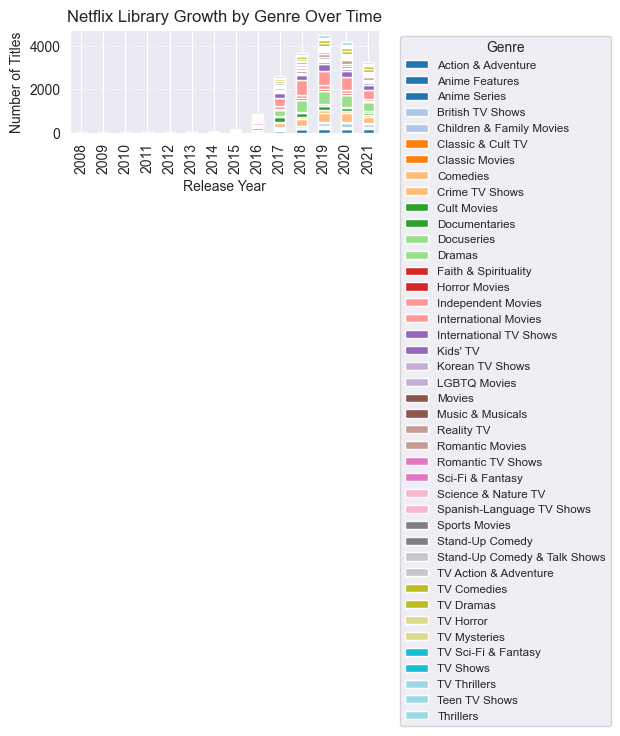

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load the Netflix dataset into a Pandas DataFrame
netflix_df = pd.read_csv("netflix_dataset.csv")

# Fill NaN values in the 'date_added' column with empty strings
netflix_df['date_added'] = netflix_df['date_added'].fillna('')

# Clean up date_added column using regex to remove leading/trailing spaces
netflix_df['date_added'] = netflix_df['date_added'].apply(lambda x: re.sub(r"^\s+|\s+$", "", str(x)))

# Convert date_added column to datetime with specified format
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], format='%B %d, %Y', errors='coerce')

# Drop rows with missing dates (if any)
netflix_df.dropna(subset=['date_added'], inplace=True)

# Extract release year and genre information
netflix_df['release_year'] = netflix_df['date_added'].dt.year
netflix_df['genre_list'] = netflix_df['listed_in'].str.split(', ')

# Explode the DataFrame to have one row for each genre
netflix_df_exploded = netflix_df.explode('genre_list')

# Group by release year and genre, then count the number of files in each category
genre_counts_by_year = netflix_df_exploded.groupby(['release_year', 'genre_list']).size().unstack(fill_value=0)

# Calculate total number of titles for each year
total_titles_by_year = netflix_df.groupby('release_year').size()

# Print out the genre counts and total number of titles for each year
print("Genre Counts by Year:")
print(genre_counts_by_year)
print("\nTotal Number of Titles by Year:")
print(total_titles_by_year)

# Plotting
plt.figure(figsize=(16, 10))  # Increased figure size
colors = plt.cm.tab20.colors  # Choosing a colormap with distinct colors

bars = genre_counts_by_year.plot(kind='bar', stacked=True, colormap='tab20')
plt.title('Netflix Library Growth by Genre Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')  # Reduced legend font size
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


### Patterns:
- There are the most releases after 2016 especially in 2019 (2016) where there is a pick
- International movies and dramas (2019 - 2020 the most) are the most popular genres throughout the years

### Insights:
- As we have already analyzed the most popular genres without connection to years we now observe the same distribution of most popular genres stays the same even throughout the years. This leads us to the conclusion that such distribution was caused by gradual superiority of each genre and not its sudden growth at some particular time

## Correlation Analysis: Explore correlations between the duration of shows/movies and their ratings.